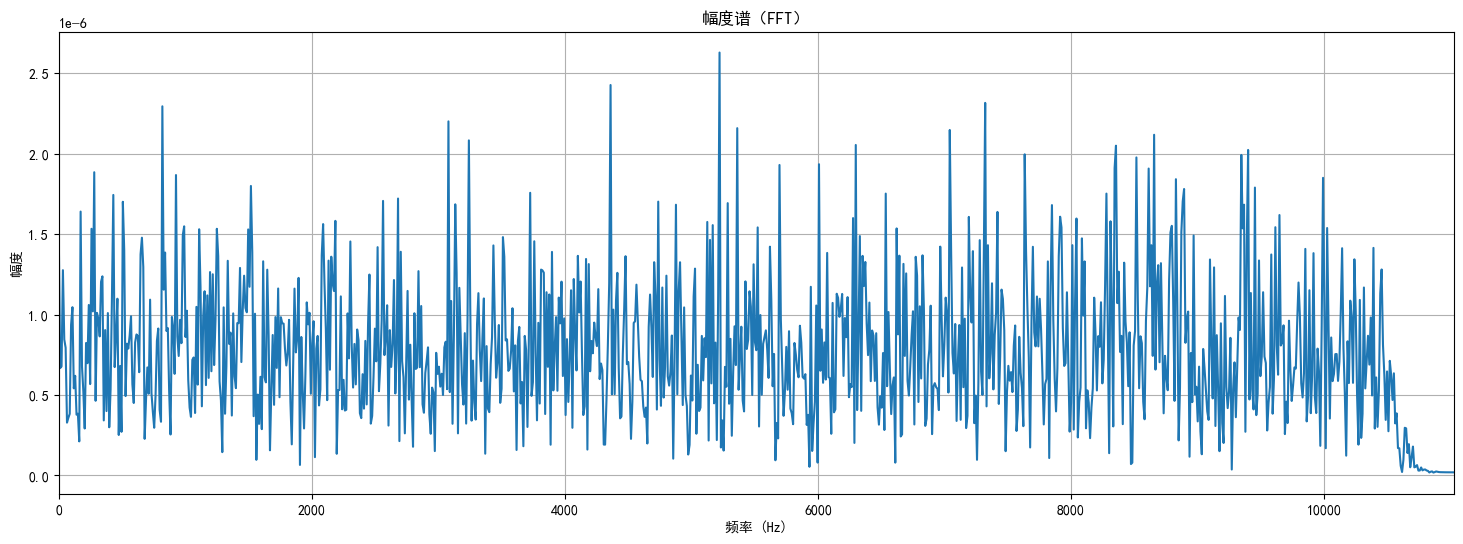

In [1]:
import signal
import librosa
import numpy as np
import matplotlib.pyplot as plt

y_path = r"D:\course\CUC_0\Py_dsp_learn\Sample_sound\787832__realsquink__glass-water-bottle-slosh.wav"

y,sr = librosa.load(y_path)

n_fft = 2048
spec = np.fft.rfft(y, n_fft)
amplitude = np.abs(spec)  # 幅度谱
frequency = np.fft.rfftfreq(n_fft, d=1/sr)  # 频率轴

# 设置中文字体
plt.rcParams["font.family"] = ["SimHei","Times New Roman"]  # 使用系统中存在的字体（可叠加）

# 绘制幅度谱
plt.figure(figsize=(18, 6))
plt.plot(frequency, amplitude)
plt.title('幅度谱（FFT）')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.grid(True)
plt.xlim(0, sr/2)  # 限制在Nyquist频率以内
plt.show()

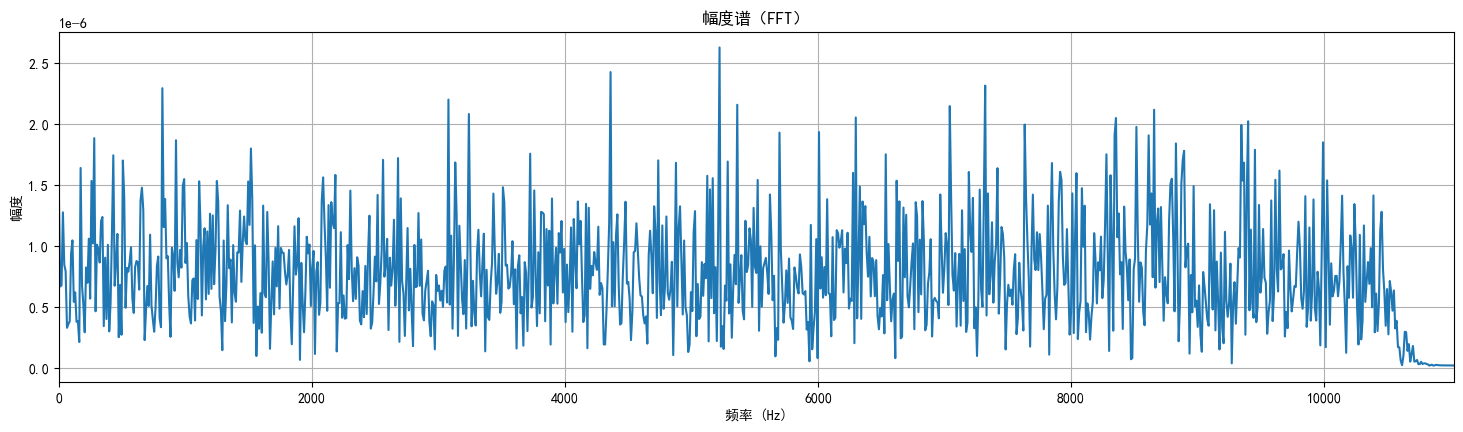

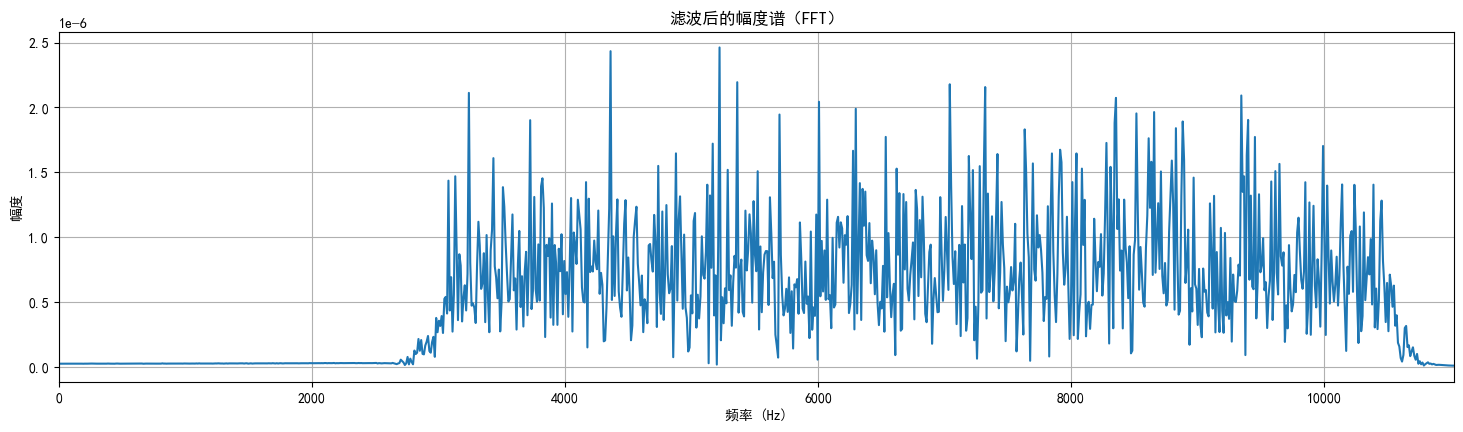

<Figure size 640x480 with 0 Axes>

In [4]:
from scipy import signal

# 设计 FIR 低通滤波器
cutoff_freq = 3000  # 截止频率 (Hz)
nyquist = 0.5 * sr   # 奈奎斯特频率
normalized_cutoff = cutoff_freq / nyquist
filter_order = 101  # 滤波器阶数
taps = signal.firwin(filter_order, normalized_cutoff, window='hamming', pass_zero=False)

# 应用滤波器
y_filtered = signal.lfilter(taps, 1, y)

# 计算滤波后信号的频谱
spec_filtered = np.fft.rfft(y_filtered, n_fft)
amplitude_filtered = np.abs(spec_filtered)  # 幅度谱

# 设置中文字体
plt.rcParams["font.family"] = ["SimHei","Times New Roman"]  # 使用系统中存在的字体（可叠加）

# 绘制原始和滤波后的波形
plt.figure(figsize=(18, 10))
# 波形图
plt.subplot(2, 1, 1)
plt.plot(frequency, amplitude)
plt.title('幅度谱（FFT）')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.grid(True)
plt.xlim(0, sr/2)  # 限制在Nyquist频率以内
plt.show()

# 频谱图（对数幅度）
plt.figure(figsize=(18, 10))
plt.subplot(2, 1, 2)
plt.plot(frequency, amplitude_filtered)
plt.title('滤波后的幅度谱（FFT）')
plt.xlabel('频率 (Hz)')
plt.ylabel('幅度')
plt.grid(True)
plt.xlim(0, sr/2)  # 限制在Nyquist频率以内
plt.show()

plt.tight_layout()
plt.show()

In [5]:
from IPython.display import Audio

Audio(y_filtered, rate=sr)